In [6]:
import os

# 1. Define the file path (Where we want to save it)
processed_path = '../data/processed/insurance_clean.csv'

# 2. Check if the "df" variable exists (it should be loaded from earlier cells)
if 'df' in locals():
    # 3. Save the DataFrame to a CSV file
    df.to_csv(processed_path, index=False)
    print(f"✅ Success! Saved clean data to: {processed_path}")
else:
    print("❌ Error: 'df' is missing. Please run the top cells of this notebook first!")

✅ Success! Saved clean data to: ../data/processed/insurance_clean.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define path to data
DATA_PATH = '../data/raw/insurance.csv'

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Load the dataset
try:
    df = pd.read_csv(DATA_PATH)
    print("✅ Data loaded successfully!")
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ Error: File not found at {DATA_PATH}. Please check the path.")

✅ Data loaded successfully!
Shape: 1338 rows, 7 columns


In [3]:
# Look at the first few rows
display(df.head())

# Look at column data types
print("\n--- Data Info ---")
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



--- Data Info ---
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [4]:
# Check for null values
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing_values[missing_values > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")

if duplicates > 0:
    print("Duplicate examples:")
    display(df[df.duplicated()].head())


--- Missing Values ---
Series([], dtype: int64)

--- Duplicate Rows: 1 ---
Duplicate examples:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


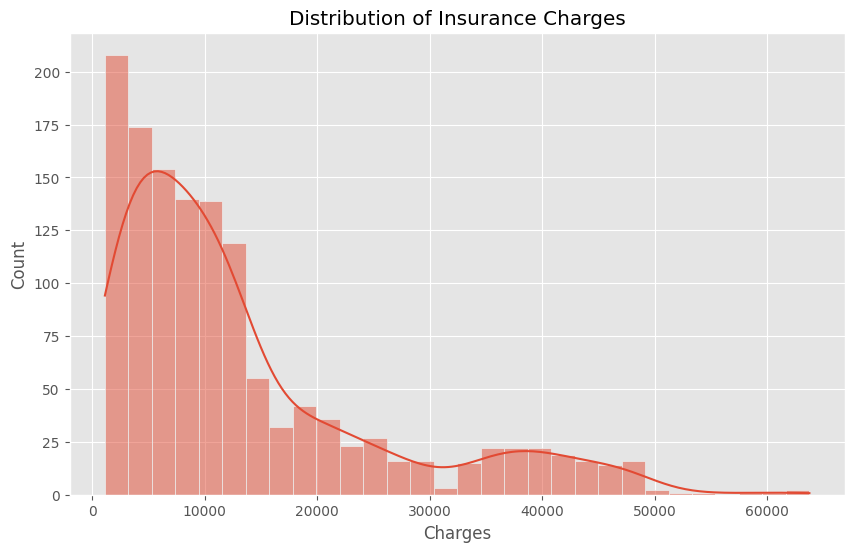

Min Charge: 1121.8739
Max Charge: 63770.42801


In [5]:
# Let's look at the distribution of 'charges' (what we are predicting)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.show()

print(f"Min Charge: {df['charges'].min()}")
print(f"Max Charge: {df['charges'].max()}")